#Create the environment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/ESoWC

/content/drive/My Drive/ESoWC


In [3]:
import pandas as pd
import xarray as xr
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

import seaborn as sns

#Upload data

In [4]:
dataset = xr.open_dataset('MAY_HOURLY_2019_NOX_and_weather.nc')
dataset = dataset.sortby(['latitude','longitude','time'])  
dataset  

<xarray.Dataset>
Dimensions:         (latitude: 33, longitude: 33, time: 720)
Coordinates:
  * time            (time) datetime64[ns] 2019-05-01T01:00:00 ... 2019-05-31
  * latitude        (latitude) float64 43.0 43.25 43.5 43.75 ... 50.5 50.75 51.0
  * longitude       (longitude) float64 4.0 4.25 4.5 4.75 ... 11.5 11.75 12.0
Data variables: (12/15)
    EMISSIONS_2019  (time, latitude, longitude) float64 ...
    u10             (latitude, longitude, time) float64 ...
    v10             (latitude, longitude, time) float64 ...
    hcc             (latitude, longitude, time) float64 ...
    lcc             (latitude, longitude, time) float64 ...
    tcc             (latitude, longitude, time) float64 ...
    ...              ...
    tmp             (latitude, longitude, time) float64 ...
    sp_hum          (latitude, longitude, time) float64 ...
    rel_hum         (latitude, longitude, time) float64 ...
    tcwv            (latitude, longitude, time) float64 ...
    tcw             (latitude, longitude, time) float64 ...
    tot_wind        (latitude, longitude, time) float64 ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.4-5)
    date:         2021-07-12 19:20:37

In [5]:
dataframe = dataset.to_dataframe()

Normalize the data

In [6]:
scaler = MinMaxScaler()

dataframe_norm =  pd.DataFrame(scaler.fit_transform(dataframe), columns=dataframe.columns)
dataframe_norm.head()

,EMISSIONS_2019,u10,v10,hcc,lcc,tcc,cvl,cvh,sp,tmp,sp_hum,rel_hum,tcwv,tcw,tot_wind
0,0.000441,0.515923,0.430374,5.551083e-17,0.045595,0.046689,0.0,0.0,0.923303,0.188289,0.000000,0.63961,0.360875,0.353796,0.304495
1,0.000299,0.530493,0.456249,5.551083e-17,0.048083,0.050270,0.0,0.0,0.921905,0.162800,0.009948,0.67372,0.348015,0.341166,0.284768
2,0.000264,0.545064,0.482124,5.551083e-17,0.050570,0.053851,0.0,0.0,0.920507,0.137311,0.019899,0.70783,0.335154,0.328536,0.265040
3,0.000246,0.533036,0.489692,5.551083e-17,0.035199,0.038484,0.0,0.0,0.921300,0.093933,0.019291,0.79351,0.330104,0.323577,0.247887
4,0.000299,0.521008,0.497261,5.551083e-17,0.019827,0.023118,0.0,0.0,0.922093,0.050552,0.018683,0.87919,0.325053,0.318619,0.230733


(15.5, -0.5)

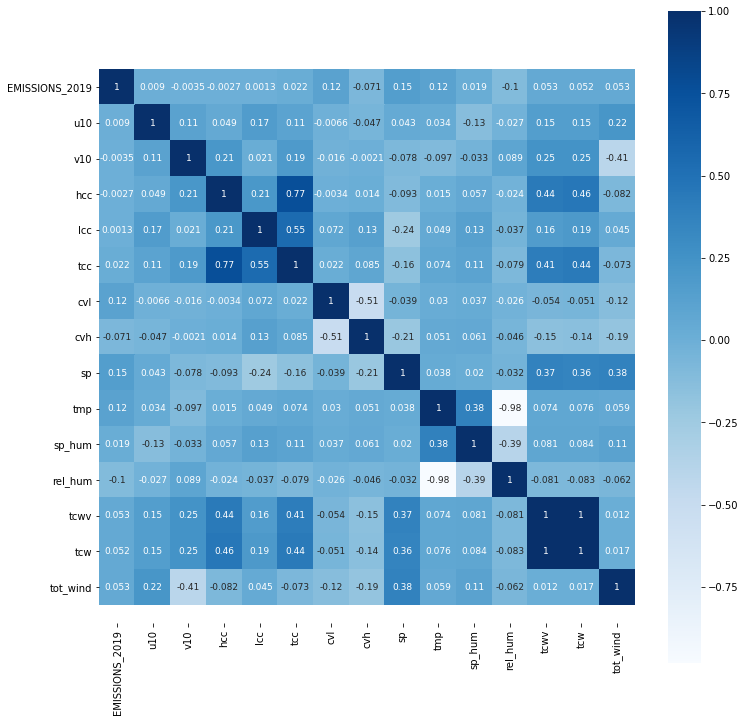

In [7]:
plt.figure(figsize=(12, 12));
cov=dataframe_norm.corr(method='pearson')
sns.heatmap(cov,square=True,annot=True,cmap="Blues",annot_kws={"size": 9});
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:1216: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


<Figure size 1080x1080 with 0 Axes>

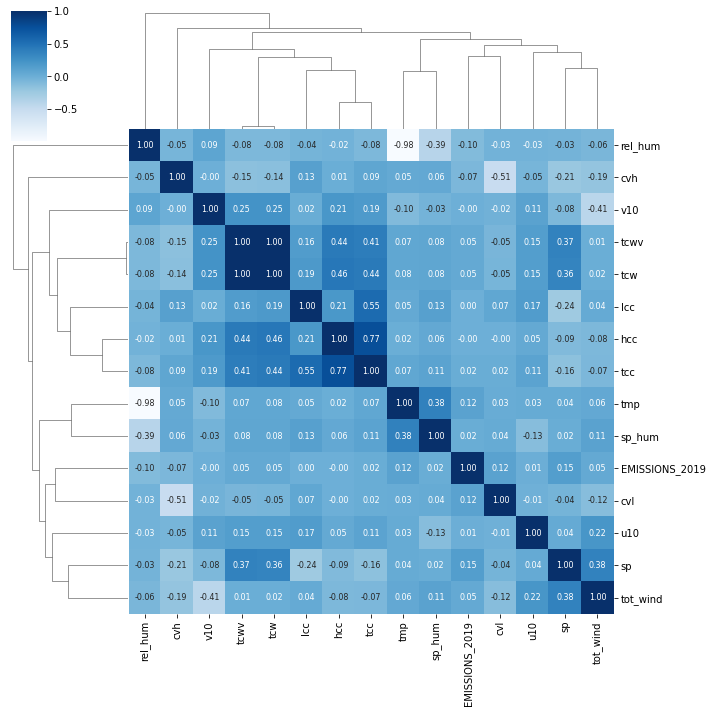

In [8]:
plt.figure(figsize=(15, 15));
sns.clustermap(cov,square=True,annot=True,cmap="Blues",annot_kws={"size": 8},fmt='.2f');  

#Time series with fixed lat-lon

In [9]:
df_fix = dataframe.reset_index()
df_fix = df_fix[df_fix.latitude==44.0]
df_fix = df_fix[df_fix.longitude==8.0]
df_fix.head()

,latitude,longitude,time,EMISSIONS_2019,u10,v10,hcc,lcc,tcc,cvl,cvh,sp,tmp,sp_hum,rel_hum,tcwv,tcw,tot_wind
106560,44.0,8.0,2019-05-01 01:00:00,7.053484e-12,1.618511,1.643330,0.008254,0.000502,0.064548,0.105222,0.216207,97016.104167,263.875309,0.000004,0.000223,12.566213,12.569819,2.349378
106561,44.0,8.0,2019-05-01 02:00:00,6.223662e-12,1.387803,1.585734,0.009576,0.001005,0.082374,0.105222,0.216207,96998.658854,263.506880,0.000004,0.000229,12.731502,12.735346,2.161357
106562,44.0,8.0,2019-05-01 03:00:00,5.808752e-12,1.157096,1.528137,0.010899,0.001507,0.100200,0.105222,0.216207,96981.214410,263.138441,0.000004,0.000235,12.896793,12.900872,1.973336
106563,44.0,8.0,2019-05-01 04:00:00,7.053484e-12,0.919132,1.559381,0.007266,0.050336,0.174846,0.105222,0.216207,97007.106771,262.343828,0.000004,0.000257,13.113761,13.121913,1.899387
106564,44.0,8.0,2019-05-01 05:00:00,1.244732e-11,0.681169,1.590625,0.003633,0.099165,0.249492,0.105222,0.216207,97032.996528,261.549205,0.000004,0.000278,13.330730,13.342954,1.825438


In [10]:
df_fix_notall = df_fix[['time','EMISSIONS_2019','u10','v10','tot_wind','hcc','lcc','tcc','sp','tmp','sp_hum','rel_hum','tcw']]
df_fix_notall=df_fix_notall.set_index('time')
df_fix_notall.head()

,EMISSIONS_2019,u10,v10,tot_wind,hcc,lcc,tcc,sp,tmp,sp_hum,rel_hum,tcw
time,,,,,,,,,,,,
2019-05-01 01:00:00,7.053484e-12,1.618511,1.643330,2.349378,0.008254,0.000502,0.064548,97016.104167,263.875309,0.000004,0.000223,12.569819
2019-05-01 02:00:00,6.223662e-12,1.387803,1.585734,2.161357,0.009576,0.001005,0.082374,96998.658854,263.506880,0.000004,0.000229,12.735346
2019-05-01 03:00:00,5.808752e-12,1.157096,1.528137,1.973336,0.010899,0.001507,0.100200,96981.214410,263.138441,0.000004,0.000235,12.900872
2019-05-01 04:00:00,7.053484e-12,0.919132,1.559381,1.899387,0.007266,0.050336,0.174846,97007.106771,262.343828,0.000004,0.000257,13.121913
2019-05-01 05:00:00,1.244732e-11,0.681169,1.590625,1.825438,0.003633,0.099165,0.249492,97032.996528,261.549205,0.000004,0.000278,13.342954


In [11]:
scaler = MinMaxScaler()

df_fix_norm =  pd.DataFrame(scaler.fit_transform(df_fix_notall), columns=df_fix_notall.columns)
df_fix_norm.index=df_fix_notall.index
df_fix_norm['time'] = df_fix_norm.index
df_fix_norm.head()

,EMISSIONS_2019,u10,v10,tot_wind,hcc,lcc,tcc,sp,tmp,sp_hum,rel_hum,tcw,time
time,,,,,,,,,,,,,
2019-05-01 01:00:00,0.070646,0.795259,0.728491,0.211508,0.008254,0.000652,0.063566,0.655173,0.235075,0.000000,0.598394,0.218294,2019-05-01 01:00:00
2019-05-01 02:00:00,0.059173,0.766319,0.724500,0.188976,0.009576,0.001304,0.081410,0.649016,0.207759,0.041035,0.627398,0.226314,2019-05-01 02:00:00
2019-05-01 03:00:00,0.053436,0.737379,0.720508,0.166444,0.010899,0.001956,0.099255,0.642859,0.180442,0.082070,0.656402,0.234333,2019-05-01 03:00:00
2019-05-01 04:00:00,0.070646,0.707529,0.722674,0.157582,0.007266,0.065307,0.173979,0.651998,0.121528,0.083952,0.759261,0.245043,2019-05-01 04:00:00
2019-05-01 05:00:00,0.145224,0.677679,0.724839,0.148720,0.003633,0.128659,0.248703,0.661135,0.062614,0.085836,0.862120,0.255752,2019-05-01 05:00:00


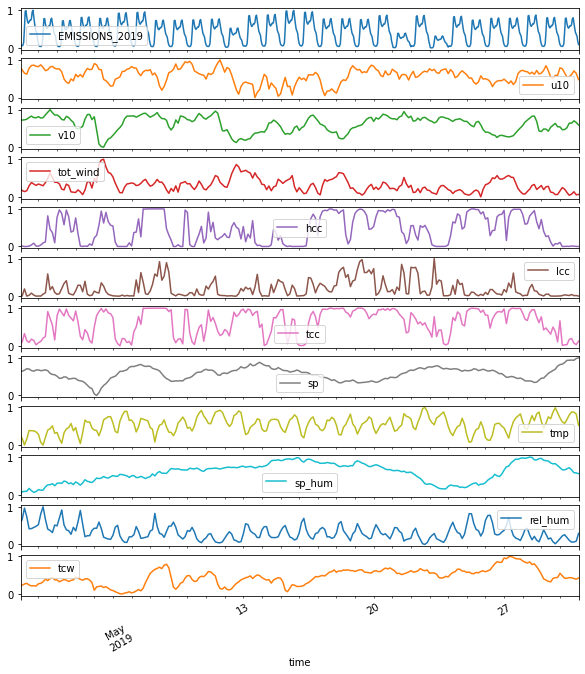

In [12]:
df_fix_norm.plot(subplots=True, figsize=(10,12), x='time');

#Split the dataset

In [ ]:
df_fix_norm_1 = df_fix_norm[['time','EMISSIONS_2019','u10','v10','tot_wind','hcc','lcc','tcc']]
df_fix_norm_2 = df_fix_norm[['time','EMISSIONS_2019','sp','tmp','sp_hum','rel_hum','tcw']]

In [ ]:
from scipy.stats import pearsonr

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="Blues",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)    

df_fix_norm_1

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureW

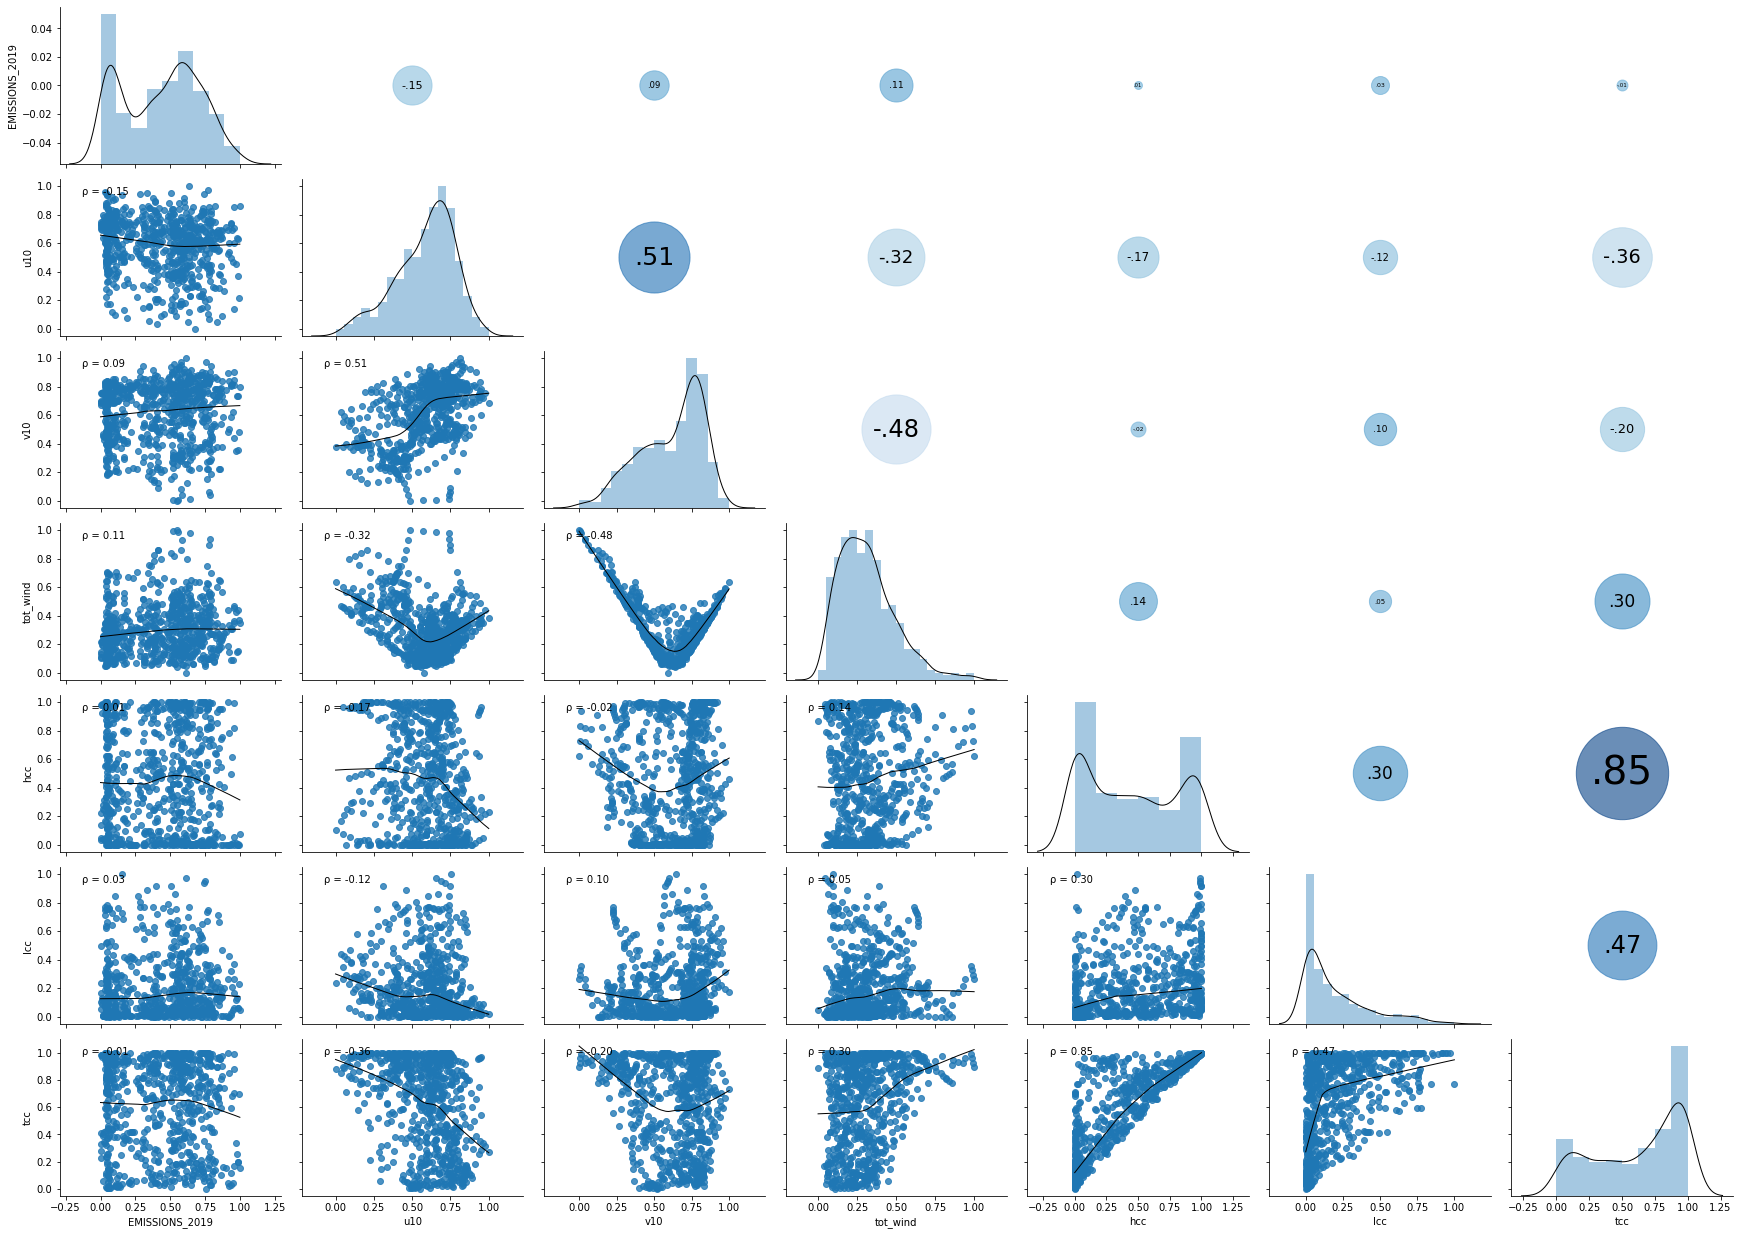

In [ ]:
# g = sns.pairplot(stocks,palette=["Blues_d"])
g = sns.PairGrid(df_fix_norm_1, aspect=1.4, diag_sharey=False)
g.map_lower(corrfunc)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'Black','linewidth':1})
g.map_diag(sns.distplot, kde_kws={'color': 'Black','linewidth':1})
g.map_upper(corrdot)
plt.show()

In [ ]:
df_fix_change_1=df_fix_norm_1.set_index('time')
df_fix_change_1 = df_fix_change_1.pct_change()
df_fix_change_1=df_fix_change_1.replace(np.nan, 0)
df_fix_change_1=df_fix_change_1.replace(np.inf, 1)
df_fix_change_1.head()

,EMISSIONS_2019,u10,v10,tot_wind,hcc,lcc,tcc
time,,,,,,,
2019-05-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-05-01 02:00:00,-0.162408,-0.036391,-0.005479,-0.106531,0.160230,1.000000,0.280726
2019-05-01 03:00:00,-0.096949,-0.037765,-0.005509,-0.119233,0.138102,0.500000,0.219193
2019-05-01 04:00:00,0.322072,-0.040481,0.003005,-0.053243,-0.333333,32.394798,0.752846
2019-05-01 05:00:00,1.055651,-0.042189,0.002996,-0.056237,-0.500000,0.970055,0.429499


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

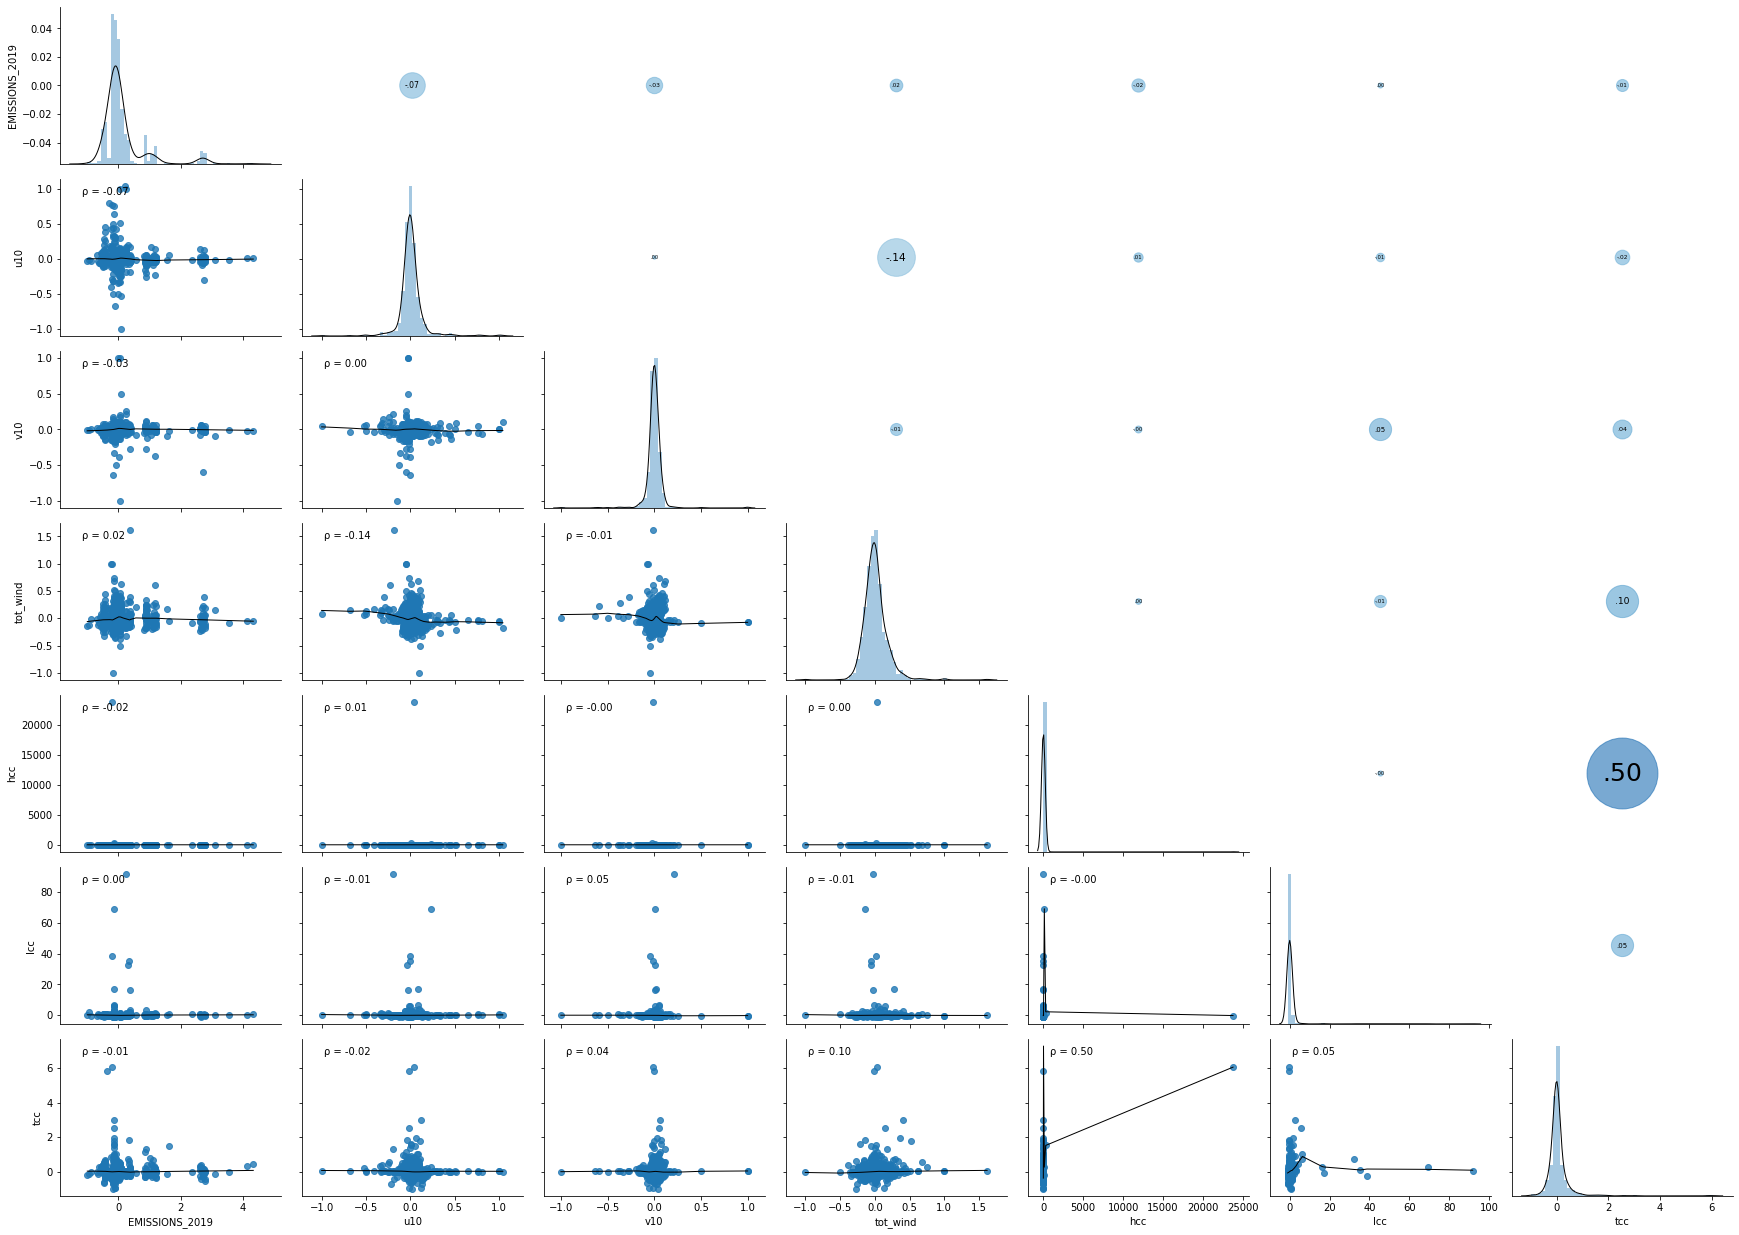

In [ ]:
g = sns.PairGrid(df_fix_change_1, aspect=1.4, diag_sharey=False)
g.map_lower(corrfunc)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'Black','linewidth':1})
g.map_diag(sns.distplot, kde_kws={'color': 'Black','linewidth':1})
g.map_upper(corrdot)
plt.show()

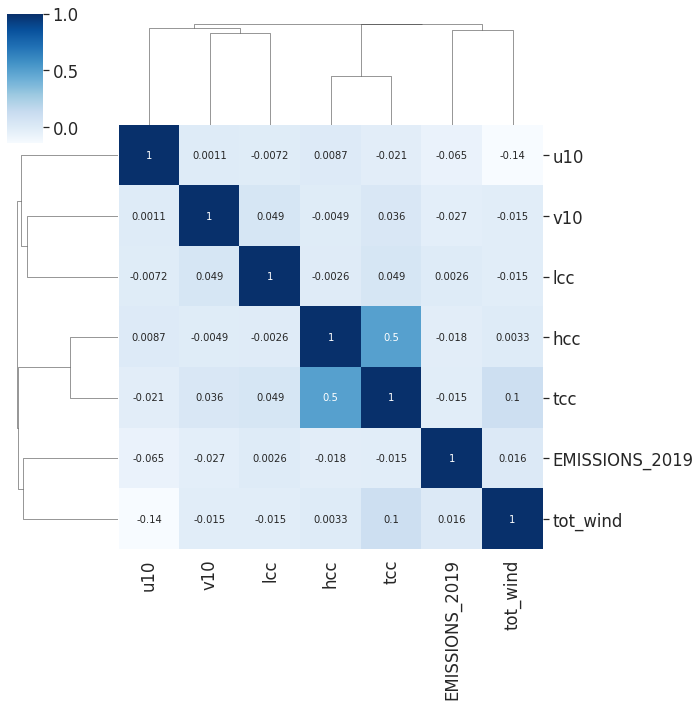

In [ ]:
correlations=df_fix_change_1.corr()
sns.set(font_scale=1.5)
sns.clustermap(correlations, cmap="Blues", annot=True, annot_kws={"size": 10});

df_fix_norm_2

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

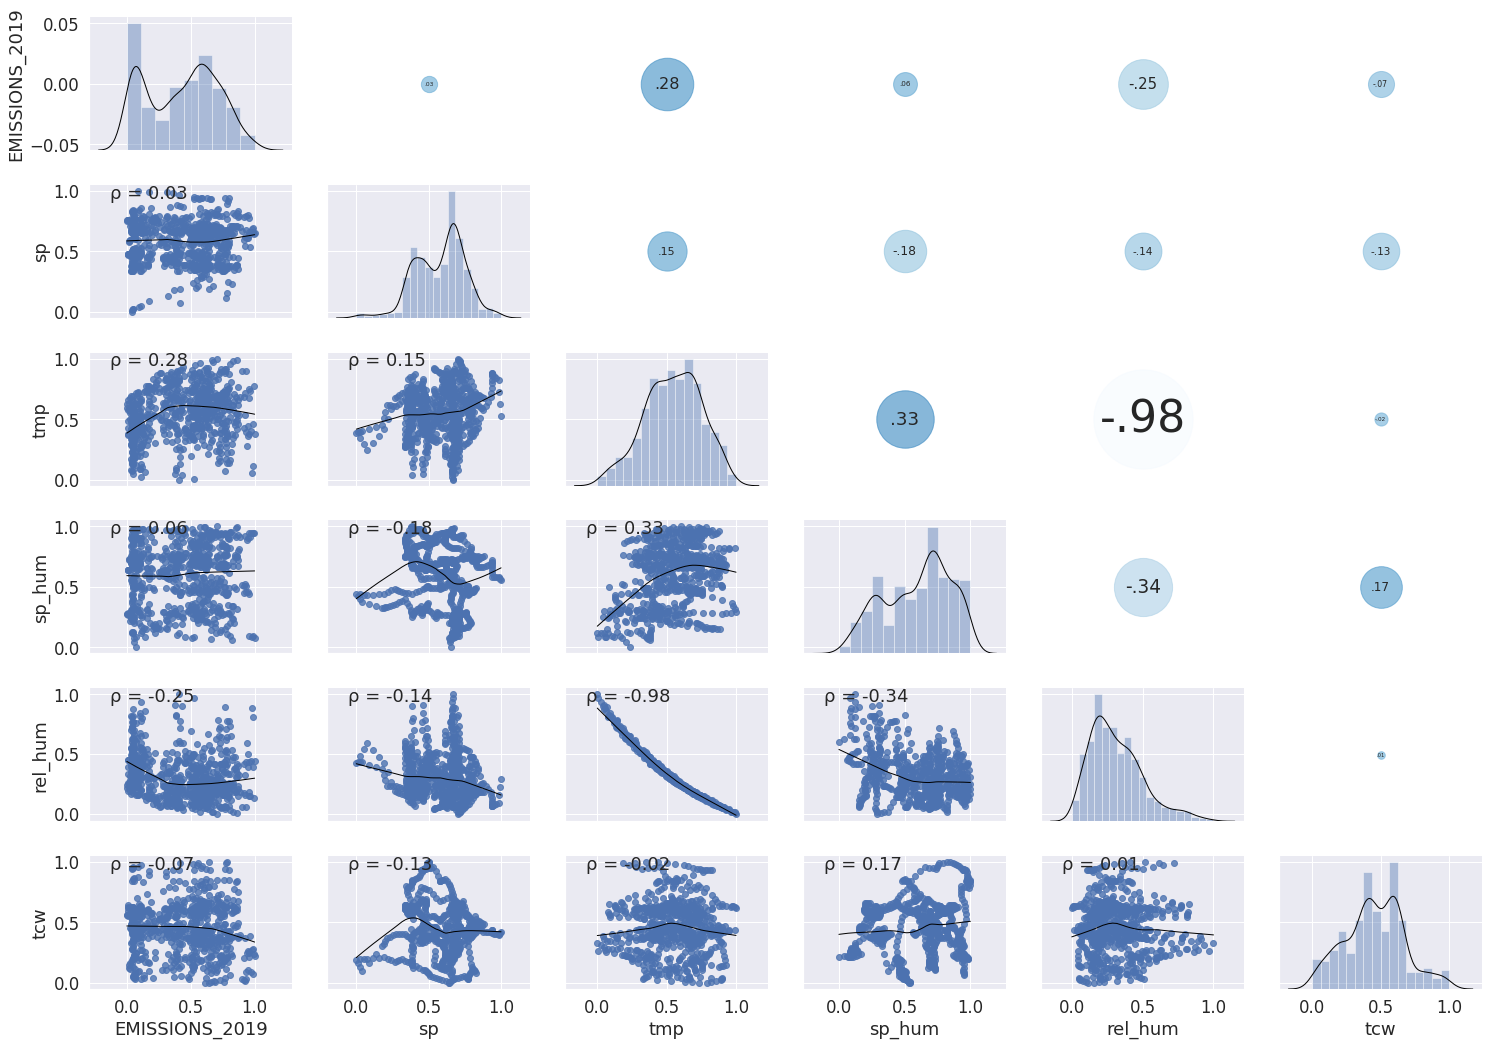

In [ ]:
# g = sns.pairplot(stocks,palette=["Blues_d"])
g = sns.PairGrid(df_fix_norm_2, aspect=1.4, diag_sharey=False)
g.map_lower(corrfunc)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'Black','linewidth':1})
g.map_diag(sns.distplot, kde_kws={'color': 'Black','linewidth':1})
g.map_upper(corrdot)
plt.show()

In [ ]:
df_fix_change_2=df_fix_norm_2.set_index('time')
df_fix_change_2 = df_fix_change_2.pct_change()
df_fix_change_2=df_fix_change_2.replace(np.nan, 0)
df_fix_change_2=df_fix_change_2.replace(np.inf, 1)
df_fix_change_2.head()

,EMISSIONS_2019,sp,tmp,sp_hum,rel_hum,tcw
time,,,,,,
2019-05-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-05-01 02:00:00,-0.162408,-0.009398,-0.116201,1.000000,0.048470,0.036737
2019-05-01 03:00:00,-0.096949,-0.009487,-0.131482,1.000000,0.046229,0.035435
2019-05-01 04:00:00,0.322072,0.014216,-0.326498,0.022931,0.156701,0.045700
2019-05-01 05:00:00,1.055651,0.014015,-0.484782,0.022438,0.135472,0.043703


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

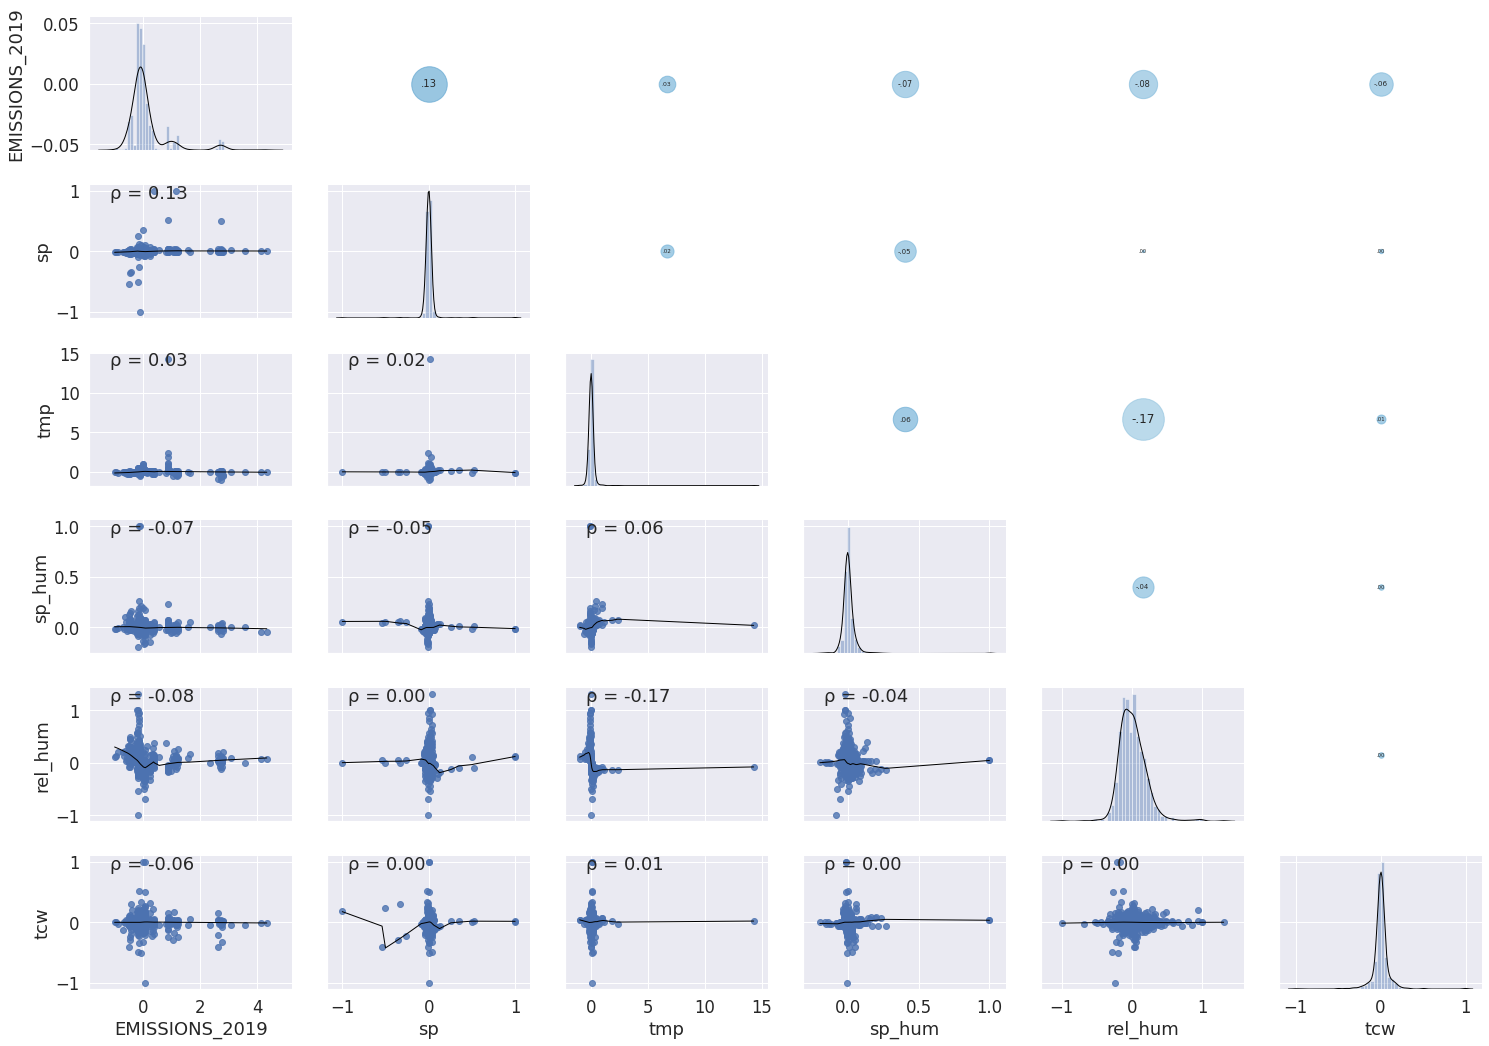

In [ ]:
g = sns.PairGrid(df_fix_change_2, aspect=1.4, diag_sharey=False)
g.map_lower(corrfunc)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'Black','linewidth':1})
g.map_diag(sns.distplot, kde_kws={'color': 'Black','linewidth':1})
g.map_upper(corrdot)
plt.show()

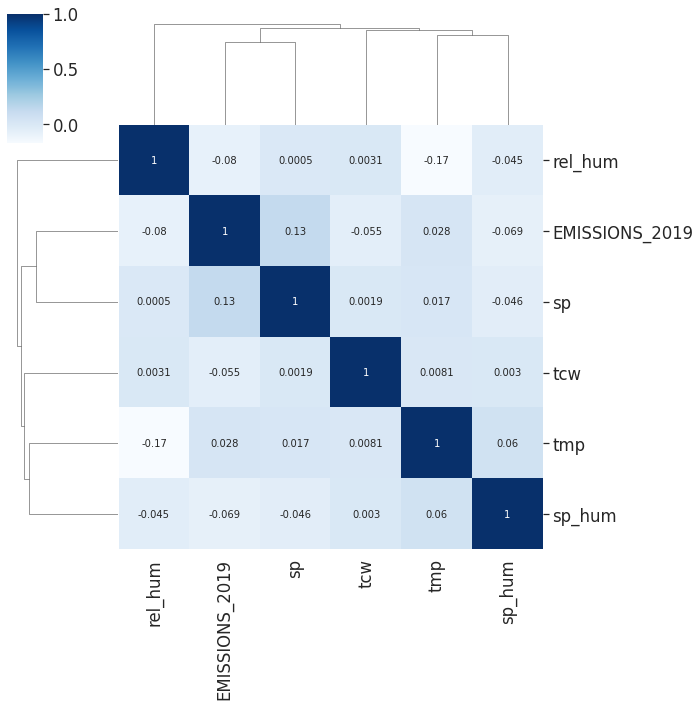

In [ ]:
correlations=df_fix_change_2.corr()
sns.set(font_scale=1.5)
sns.clustermap(correlations, cmap="Blues", annot=True, annot_kws={"size": 10});

#Shift


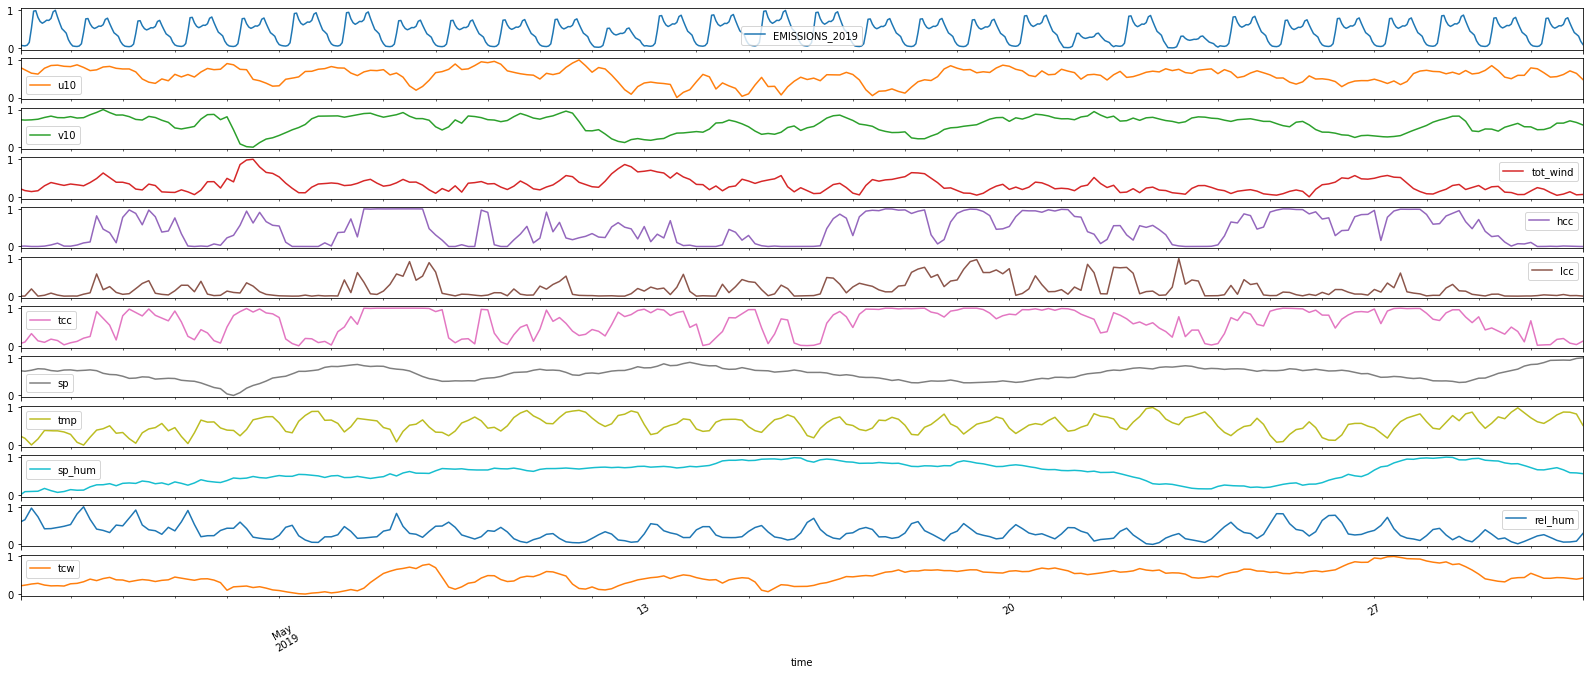

In [13]:
df_fix_norm.plot(subplots=True, figsize=(28,12), x='time');

In [14]:
df_shift=df_fix_norm

for x in range(-12, 12):
  columnName = 'EMISSIONS_shif_'+str(x)
  df_shift[columnName]=df_shift.EMISSIONS_2019.shift(periods=x)
  df_shift=df_shift.dropna(subset = [columnName])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(36.5, -0.5)

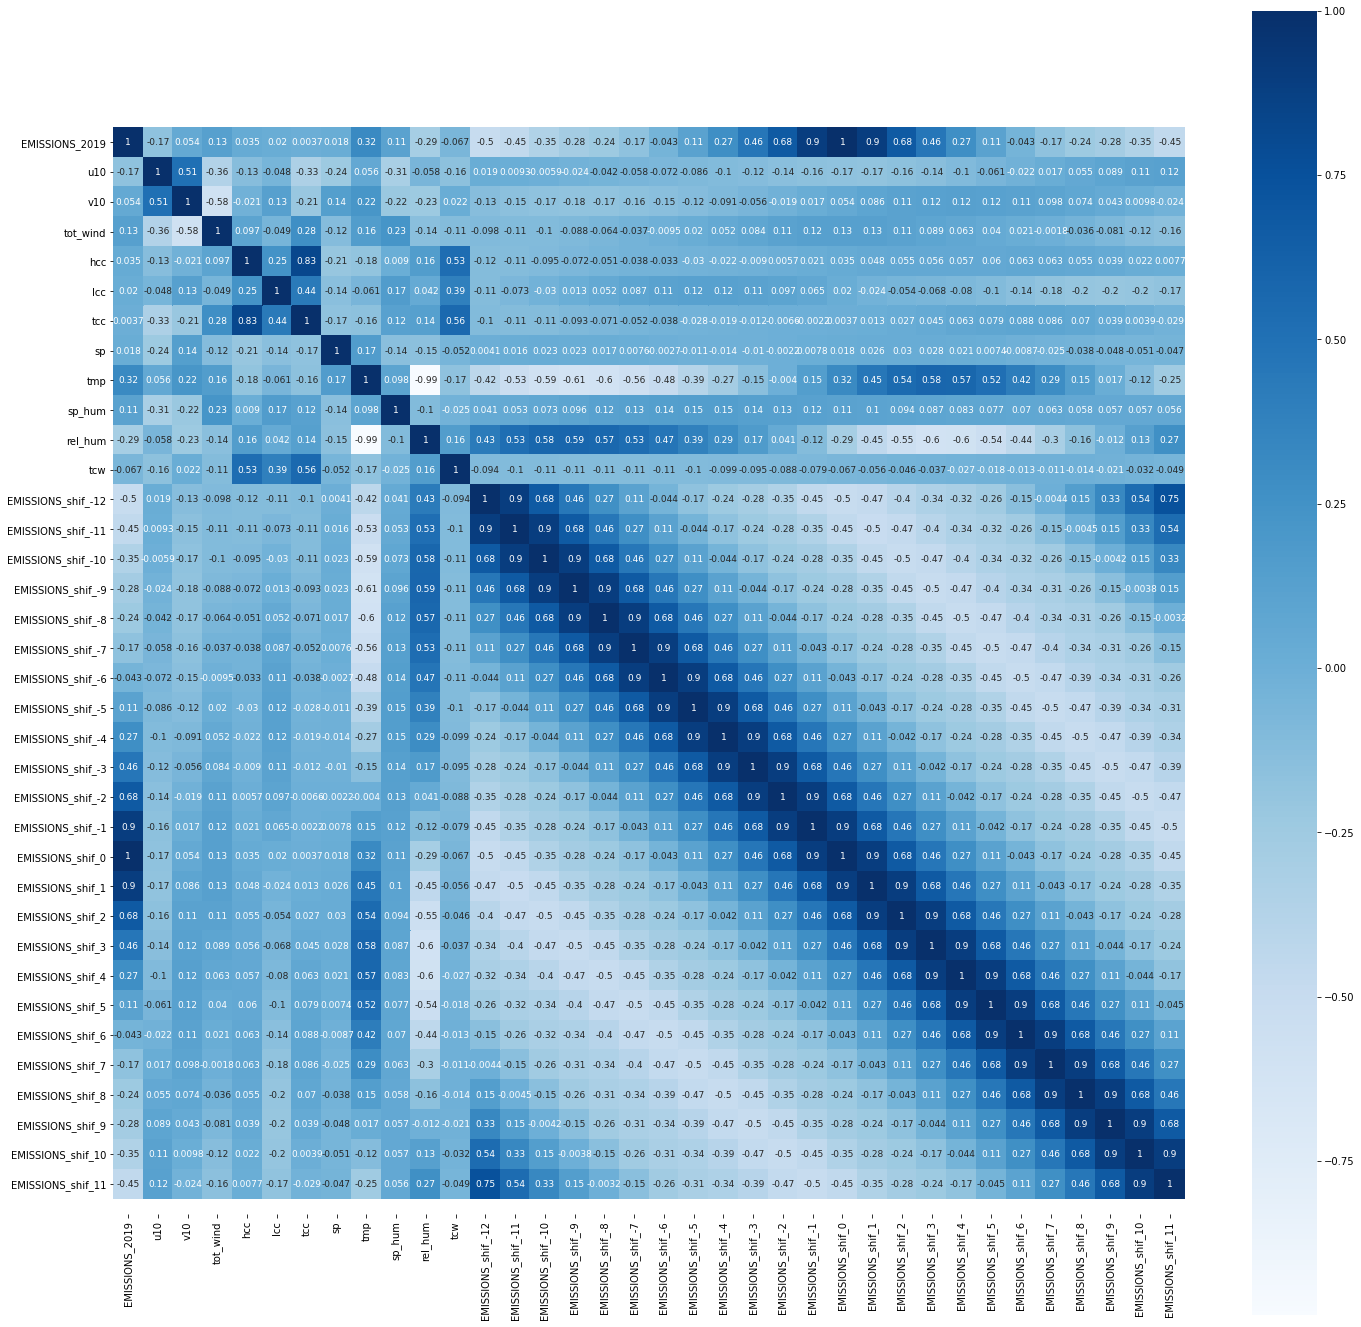

In [16]:
plt.figure(figsize=(24, 24));
cov=df_shift.corr(method='pearson')
sns.heatmap(cov,square=True,annot=True,cmap="Blues",annot_kws={"size": 9});
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

-9 is the best
We choose behind because it make more sense

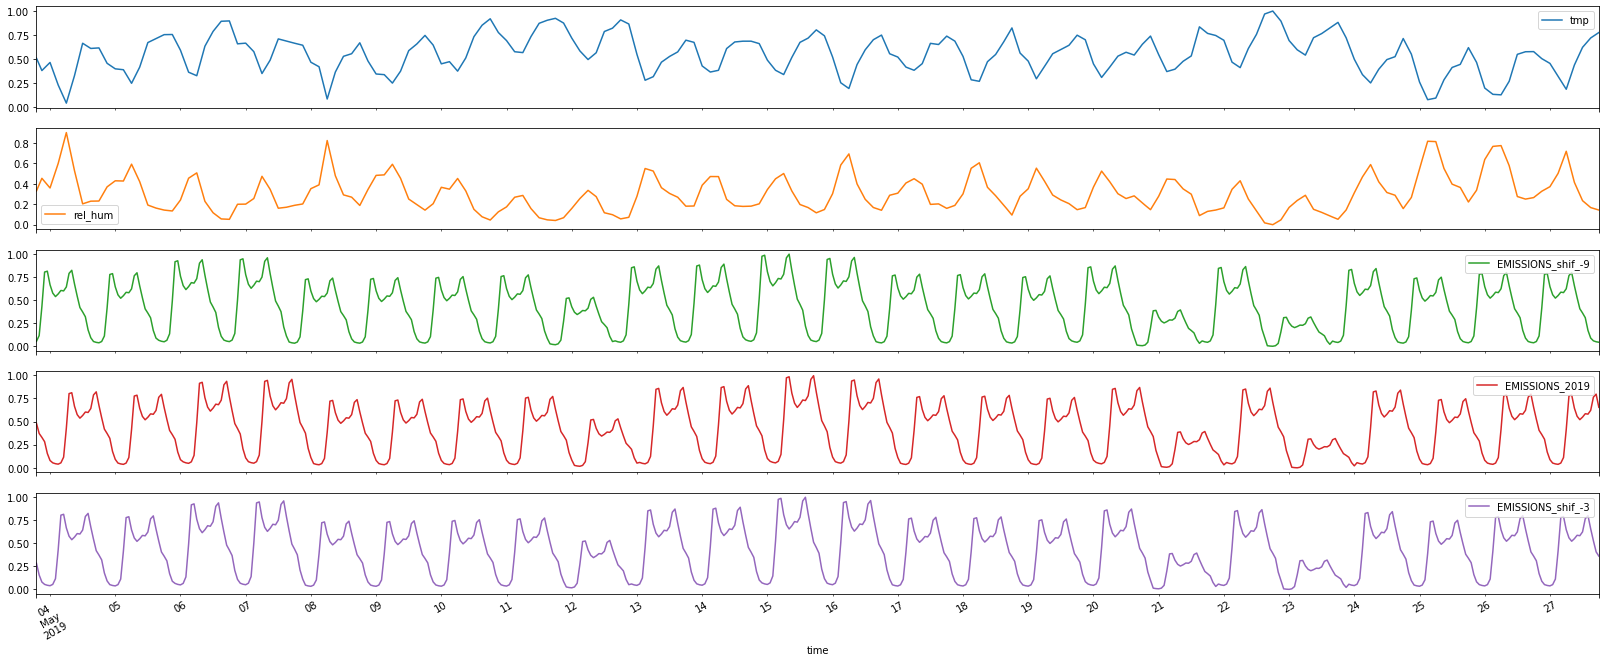

In [17]:
df_reduced = df_shift[['time','tmp', 'rel_hum', 'EMISSIONS_shif_-9','EMISSIONS_2019', 'EMISSIONS_shif_-3']]
df_reduced.plot(subplots=True, figsize=(28,12), x='time');